## Assignment 5 - Yashveer Beniwal

In [1]:
from IPython.display import Image
import numpy as np
from statsmodels.formula.api import ols
import pandas as pd
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

<b>1 (OpenIntro Statistics - 8.4) - 40 marks</b> Researchers interested in the relationship between absenteeism from school and certain demographic characteristics of children collected data from 146 randomly sampled students in rural New South Wales, Australia, in a particular school year. Below are three observations from this data set:


|record #   | eth   | sex  | lrn  | days  |
|-----------|-------|------|------|-------|
| 1         | 0     | 1    | 1    | 2     |
| 2         | 0     | 1    | 1    | 11    |
| ...       | ...   | ...  | ...  | ...   |
| 146       | 1     | 0    | 0    | 37    |


The summary table below shows the results of a linear regression model for predicting the average number of days absent based on ethnic background (eth: 0 - aboriginal, 1 - not aboriginal), sex (sex: 0 - female, 1 - male), and learner status (lrn: 0 - average learner, 1 - slow learner).

|             | estimate   | Std. error  | t-value  | Pr(>abs(t))  |
|-------------|------------|-------------|----------|--------------|
| (intercept) | 18.93      | 2.57        | 7.37     | 0.0000       |
| eth         | -19.11     | 2.60        | -3.51    | 0.0000       |
| sex         | 3.1        | 2.64        | 1.18     | 0.2411       |
| lrn         | 2.15       | 2.65        | 0.81     | 0.4177       |

(a) Write the equation of the regression line.<br>
(b) Interpret each one of the slopes in this context.<br>
(c) Calculate the residual for the first observation in the data set: a student who is aboriginal, male, a slow learner, and missed 2 days of school.<br>
(d) The variance of the residuals is 240.57, and the variance of the number of absent days for all students in the data set is 264.17. Calculate the $R^{2}$ and the adjusted $R^{2}$. Note that there are 146 observations in the data set.

<b>Answer</b>

<b>a) Write the equation of the regression line.</b>
```
ŷ = 18.93 − 9.11×eth + 3.10×sex + 2.15×lrn
```
<b>(b) Interpret each one of the slopes in this context.</b>
- There is a reduction of 9.11 absent days when the student is not aboriginal.
- There is a increase of 3.10 days when the student is male.
- There is a increase of 2.15 days when the student is a slow learner.

<b>(c) Calculate the residual for the first observation in the data set: a student who is aboriginal, male, a slow learner, and missed 2 days of school.</b>
```
y = 2 days
ŷ = 18.93 − 9.11×0 + 3.10×1 + 2.15×1
ŷ = 18.93 − 9.11×0 + 3.10×1 + 2.15×1
ŷ = 24.18 days

Residual = y - ŷ
Residual = -22.18
```

<b>(d) The variance of the residuals is 240.57, and the variance of the number of absent days for all students in the data set is 264.17. Calculate the R2 and the adjusted R2 . Note that there are 146 observations in the data set.</b>

In [2]:
var_res = 240.57
var_bw = 264.17
n = 146
k = 3

# R-squared = 1 - (variance in residuals / variance in birth weights)
r2 = 1 - (var_res/var_bw)

# Adjusted R-squared is R-squared 
r2_adj = 1 - ((1 - r2)*(n - 1) / (n - k - 1))

print("R-squared is %.4f" % r2)
print("Adjusted R-squared is %.4f" % r2_adj)

R-squared is 0.0893
Adjusted R-squared is 0.0701


-----------------------------------------------------------------
<b>2 (OpenIntro Statistics - 8.8) - 10 marks</b> Exercise 8.4 considers a model that predicts the number of days absent using three predictors: ethnic background (eth), gender (sex), and learner status (lrn). The table below shows the adjusted $R^{2}$ for the model as well as adjusted $R^{2}$ values for all models we evaluate in the first step of the backwards elimination process.


| Model             | Adjusted R-squared |
|-------------------|--------------------|
| Full model        | 0.0701             |
| No ethnicity      | -0.0033            |
| No sex            | 0.0676             |
| No learner status	| 0.0723             |

Which, if any, variable should be removed from the model first?

<b>Answer</b>

Using the Adjusted R-squared=0.0723 the learner status variable should be removed from the model first.

-----------------------------------------------------------------------

<b> 3 (OpenIntro Statistics - 8.10) - 10 marks</b> Exercise 8.4 provides regression output for the full model, including all explanatory variables available in the data set, for predicting the number of days absent from school. In this exercise we consider a forward-selection algorithm and add variables to the model one-at-a-time. The table below shows the $p$-value and adjusted $R^{2}$ of each model where we include only the corresponding predictor. Based on this table, which variable should be added to the model first?

| Variable            | Ethnicity    | Sex     | Learner status |
|---------------------|--------------|---------|----------------|
| p-value             | 0.0007       | 0.3142  | 0.5870         |
| Adjusted R-squared  | 0.0714       | 0.0001  | 0              |

<b>Answer</b>


`Etnicity should be added first. because p-value of etnicity is <0.05. It is the inly significant feature. Also it has the highest contribution in explaining the response variable (R-squared, Adjusted R-squared).`


-----------------------------------------------------------------------------
<b>4 (OpenIntro Statistics - 8.14) - 10 marks</b> A regression model for predicting GPA from gender and IQ was fit, and both predictors were found to be statistically significant. Using the plots on page 401 (and attached here - question_4_plots.png), determine if this regression model is appropriate for these data.

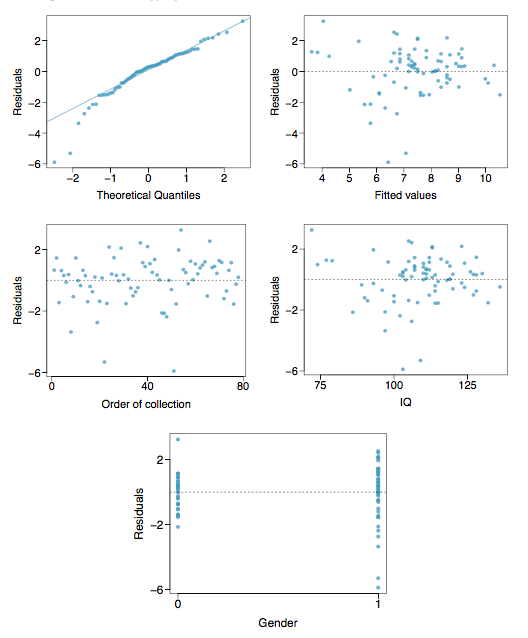

In [3]:
Image(filename='question_4_plots.png') 

<b>Answer</b>

Everything looks good except the first few plots.<br>
<b>Plot 1 (top left)</b> - The residuals are nearly normal. Slight deviations at the tails, although this is nothing of concern<br>
<b>Plot 2 (top right)</b> - we can observe the residuals and fitted values do not seem to be correlated which means they are independent.<br>
<b>Reamining plots</b> - Most of the values lie in the normal region in all the graphs. Overall, any concers here are not very strong. While there may be a few data points that could benefit the model by being removed, they should not introduce substantial leverage. It's not unreasonable to proceed with this model.

----------------------------------------------------------------------------------------

<b>5 (OpenIntro Statistics - 8.16) - 30 marks</b> On January 28, 1986, a routine launch was anticipated for the Challenger space shuttle. Seventy-three seconds into the flight, disaster happened: the shuttle broke apart, killing all seven crew members on board. An investigation into the cause of the disaster focused on a critical seal called an O-ring, and it is believed that damage to these O-rings during a shuttle launch may be related to the ambient temperature during the launch. The table on page 403 (and attached here - question_5_table.png) summarizes observational data on O-rings for 23 shuttle missions, where the mission order is based on the temperature at the time of the launch. Temp gives the temperature in Fahrenheit, Damaged represents the number of damaged O-rings, and Undamaged represents the number of O-rings that were not damaged.

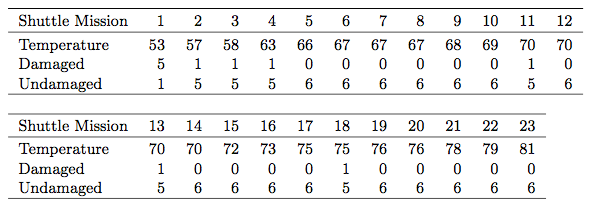

In [4]:
Image(filename='question_5_table.png') 

(a) Each column of the table represents a different shuttle mission. Examine these data and describe what you observe with respect to the relationship between temperatures and damaged O-rings.<br>
(b) Failures have been coded as 1 for a damaged O-ring and 0 for an undamaged O-ring, and a logistic regression model was fit to these data. A summary of this model is given below. Describe the key components of this summary table in words.

|              | Estimate      | Std. Error  | z value  | Pr(>abs(z)) |
|--------------|---------------|-------------|----------|-------------|
| (Intercept)  | 11.663        | 3.2963      | 3.54	    | 0.0004      |
| Temperature  | -0.2162       | 0.0532      | -4.07    | 0           |

(c) Write out the logistic model using the point estimates of the model parameters.<br>
(d) Based on the model, do you think concerns regarding O-rings are justified? Explain.

<b>Answer</b>

<b>(a) Each column of the table represents a different shuttle mission. Examine these data and describe what you observe with respect to the relationship between temperatures and damaged O-rings.</b>

In [5]:
temprature = [53,57,58,63,66,67,67,67,68,69,70,70,70,70,72,73,75,75,76,76,78,79,81]
damaged = [5,1,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0]
undamaged = [1,5,5,5,6,6,6,6,6,6,5,6,5,6,6,6,6,5,6,6,6,6,6]

d = {'Temprature': temprature, 'Damaged': damaged, 'Undamaged': undamaged}
df = pd.DataFrame(data=d)
model = ols("Damaged ~ Temprature", data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                Damaged   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     14.45
Date:                Fri, 23 Mar 2018   Prob (F-statistic):            0.00104
Time:                        23:31:24   Log-Likelihood:                -27.908
No. Observations:                  23   AIC:                             59.82
Df Residuals:                      21   BIC:                             62.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2857      1.800      4.049      0.0

In [6]:
trace = go.Scatter(
    x = temprature,
    y = damaged,
    name = 'Above',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace2 = go.Scatter(
    x = np.arange(50,85),
    y = np.add(np.multiply(np.arange(50,85), -0.0979), 7.2857),
    mode = 'lines',
    name = 'lines'
)


layout= go.Layout(
    title= 'Scatterplot temprature vs damaged',
    xaxis= dict(
        title= 'temprature',
    ),
    yaxis=dict(
        title= 'damaged',
    ),
    showlegend= False
)

fig= go.Figure(data=[trace, trace2], layout=layout)
iplot(fig)

Observation:

- Higher number of damaged O-rings are observed when lower temperatures.

- Less number of damaged O-rings are observed when higher temperatures.

<b>(b) Failures have been coded as 1 for a damaged O-ring and 0 for an undamaged O-ring, and a logistic regression model was fit to these data. A summary of this model is given below. Describe the key components of this summary table in words.</b>

`This model is defined by two important factors: intercept and the temperature values, the estimate provides the parameter estimate for the model. The z value and the p-value helps with determining the differences between important information vs less significant information, this helps in detecting how goof the variables predict the model.`

<b>(c) Write out the logistic model using the point estimates of the model parameters.</b>

$$log\bigg(\frac{p_{i}}{1-p_{i}}\bigg) = 11.663 - 0.2162×Temperature$$

<b>(d) Based on the model, do you think concerns regarding O-rings are justified? Explain.</b>

`yes the concerns regarding O-rings are justified because of the importance of the part, we can deduct a high probability of damage to O-rings under 60 degree.`
